In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Del 2

In [24]:
# Skapar en dataframe och tar bort all data med nullvärden
data = pd.read_csv('./diamonds/diamonds.csv')
df = pd.DataFrame(data).dropna()

## Innehåll

### *Syfte*

### *Analys*

#### - Carat

#### - Färg

#### - Slipning

#### - Klarhet

### *Executive Summary*

#### - Huvudpunkter

#### - Rekomendation

## Syfte

Syftet med analysen är att utvärdera diamanternas egenskaper – färg, slipning och klarhet – för att identifiera de segment som har en stabil värdeutveckling och ett varierat utbud i olika prisklasser. Detta ger Guldfynd underlag för strategiska investeringsbeslut inom Wesselton-diamanter.

## Analys

Eftersom att Guldfynd är en smyckeskedja är det värt att ta målgrupperna i hänsyn eftersom att det ger en insikt i vilka faktorer hos diamanterna vi kan vara ute efter. 

Jag har valt att filtrera ut rader med information som saknas eller där det kan finnas felaktig information som storleken på diamanterna där x, y, z är 0. Jag har även valt att exkludera diamanter över 2 carat då större stenar främst återfinns inom investeringssegmentet snarare än kommersiell smyckeshandel. På marknaden för smycken är det vanligare med diamanter mellan 0.5 och 2 carat, eftersom dessa storlekar erbjuder en bra balans mellan estetik, pris och tillgänglighet. Större diamanter, särskilt över 2–2.5 carat, tenderar att vara betydligt dyrare och riktar sig ofta till samlare och investerare snarare än konsumenter som letar efter smycken för dagligt eller speciellt bruk.

In [25]:
# Ta bort rader utan data
df = pd.DataFrame(data).dropna()

# Ta bort felaktig data för storlek
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]

# Sortera baserat på carat
df = df[(df['carat'] <= 2)]

df = df.rename(columns={df.columns[0]: "id"})

### Carat

Pris och carat har ett tydligt samband: ju större diamanten är, desto dyrare blir den. Detta beror på att större diamanter är mer sällsynta och kräver att fler råmaterial bevaras vid slipning.
Men priset ökar inte helt linjärt – en diamant som är dubbelt så stor kostar oftast mer än dubbelt så mycket eftersom efterfrågan på större stenar är hög och utbudet är begränsat. Andra faktorer som klarhet, färg och slipning påverkar också priset.

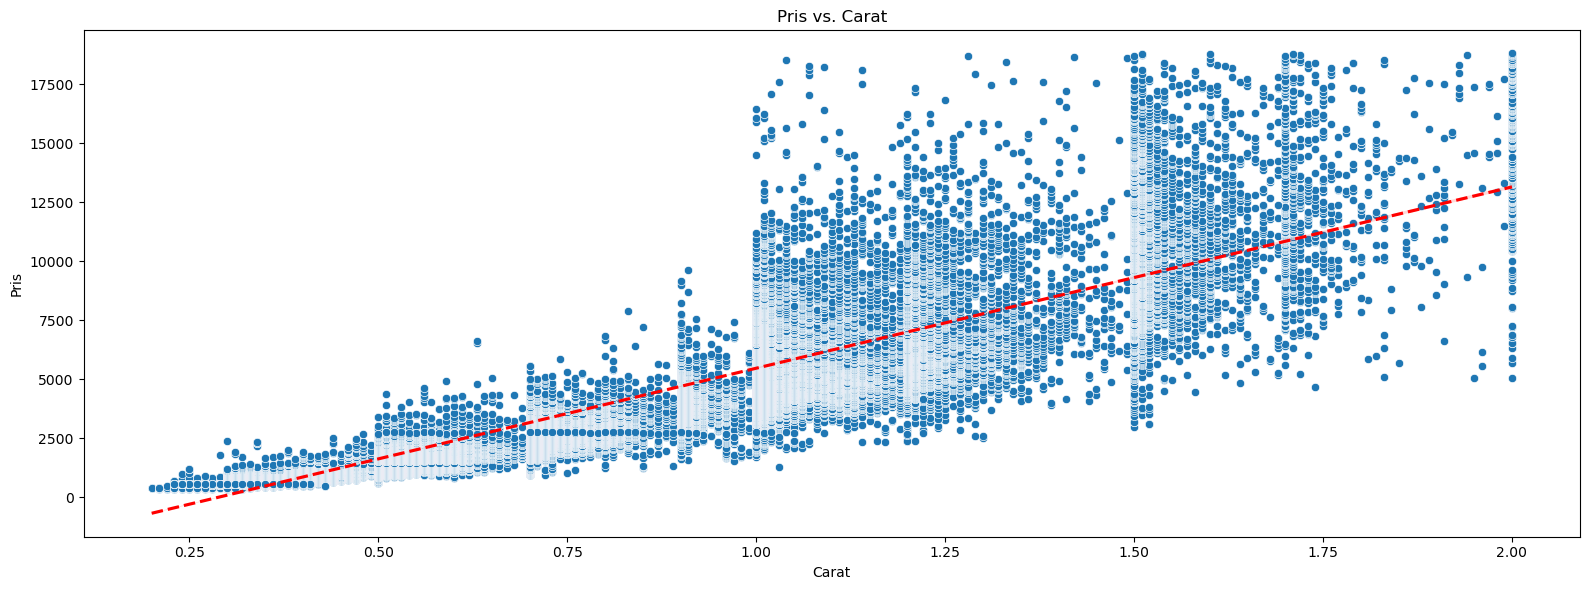

In [26]:
fig, ax = plt.subplots(tight_layout=True, figsize=(16, 6))

# Scatterplot
sns.scatterplot(x='carat', y='price', data=df)

sns.regplot(x='carat', y='price', data=df, ax=ax, scatter=False, color='red', line_kws={'linestyle': 'dashed'})

ax.set_xlabel('Carat')
ax.set_ylabel('Pris')
ax.set_title('Pris vs. Carat')

plt.show()

### Färg
Mängden av diamanter med färgen "G" kan förklaras för dess popularitet, bland annat för att de är nära färglösa på GIA-skalan. Generiellt brukar diamanter med på GIA-skalan från D till F vara dyrare eftersom att de är färglösa men med stapeldiagramet kan vi se att medelpriset per diamant är lägre än färgen G. Om priset är lägre än G, kan det innebära att Guldfynd kan erbjuda färglösa diamanter till ett mer konkurrenskraftigt pris. 

![diamond color grading](./images/diamond_color_grade.png)

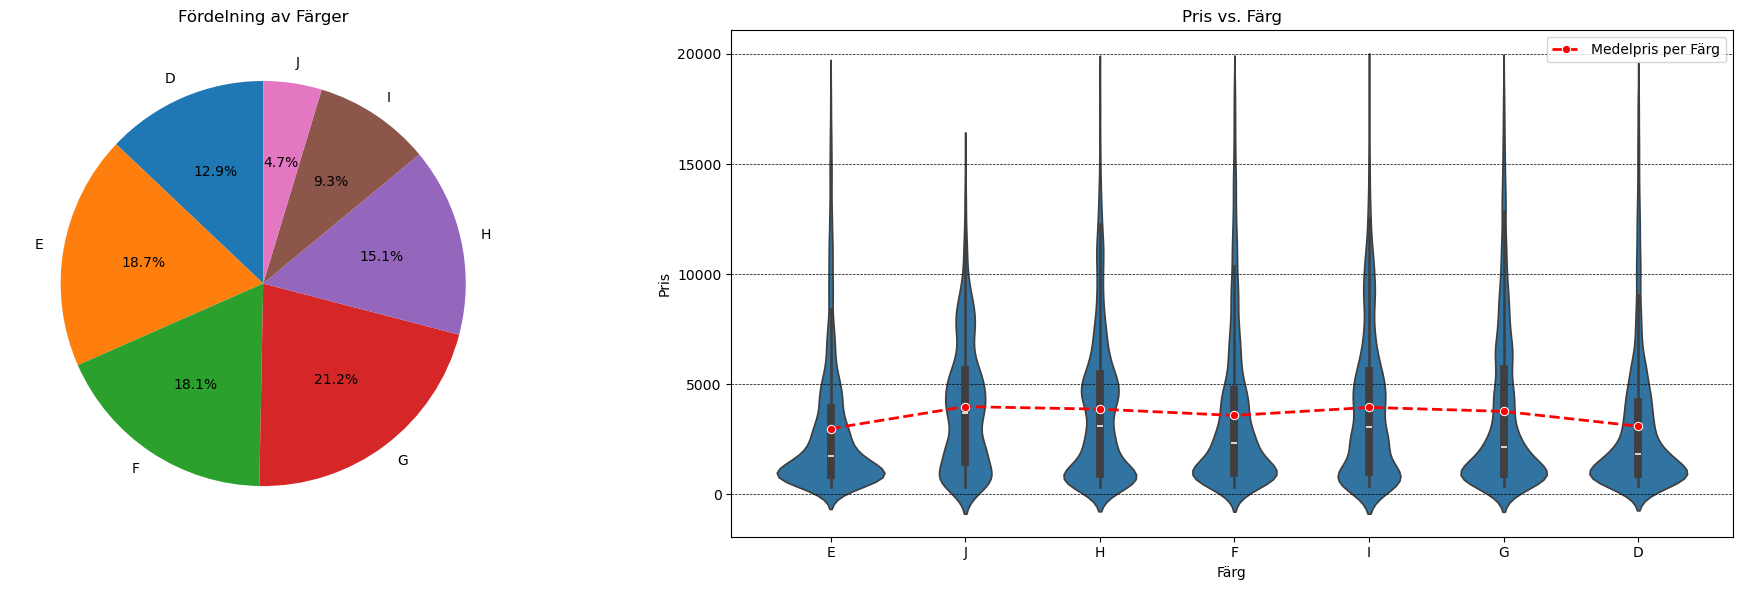

In [27]:
distribution_by_cuts = df.groupby(['cut']).size()
distribution_by_color = df.groupby(['color']).size()
avg_price_per_color = df.groupby('color')['price'].mean()

fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(20, 6))

axes[0].pie(
    distribution_by_color, 
    labels=distribution_by_color.index, 
    autopct='%1.1f%%', 
    startangle=90
)

axes[0].set_title('Fördelning av Färger')

sns.violinplot(x='color', y='price', data=df, ax=axes[1])
axes[1].set_ylabel('Pris')
axes[1].set_xlabel('Färg')
axes[1].set_title('Pris vs. Färg')
axes[1].grid(color='black', linestyle='--', linewidth=0.5, axis='y')

sns.lineplot(
    x=avg_price_per_color.index, 
    y=avg_price_per_color.values, 
    ax=axes[1], 
    color='red', 
    marker='o', 
    linestyle='dashed', 
    linewidth=2, 
    label='Medelpris per Färg'
)

plt.show()

### Slipning

De slipningsgrader som finns i ditt dataset – Fair, Good, Very Good, Premium och Ideal – motsvarar olika nivåer av diamantens ljusreflektion och kvalitet. Här är hur de relaterar till Guldfynds utbud:
Slipningsgrader och deras betydelse
- Fair – En diamant med denna slipning reflekterar endast en liten del av ljuset och kan se mindre briljant ut.
- Good – Dessa diamanter reflekterar en rimlig mängd ljus och kan fortfarande ha en fin glans.
- Very Good – En högkvalitativ slipning som reflekterar det mesta av ljuset och ger en stark briljans.
- Premium – En slipning som ligger nära Ideal och ger en mycket hög ljusreflektion.
- Ideal – Den bästa slipningen, där diamantens proportioner är optimerade för maximal ljusreflektion och briljans.

Bland Guldfynds utbud använder de ofta benämningar som Brilliant och Wesselton, vilket inte direkt motsvarar GIA:s slipningsgrader men indikerar hög kvalitet. Om vi kollar på slipningen som förekommer i datan kan vi se vilka de mest förekommande är Ideal, Premium och Very Good. Jämför vi det med vad som passar för smycken och tar en kik på medelpriset per slipning kan vi utgöra att det inte rör sig om en större prisskillnad mellan slipningarna. Brilliant-slipning (rundslipad diamant) handlar mer om formen än graden av slipningskvalitet. De flesta briljantslipade diamanter har en Very Good, Premium eller Ideal slipningsgrad eftersom dessa ger maximal ljusreflektion. Däremot med Wesselton (G-H färg) kombinerar en vit färg med högkvalitativ slipning. För att maximera diamantens skönhet används ofta Very Good till Ideal slipning.


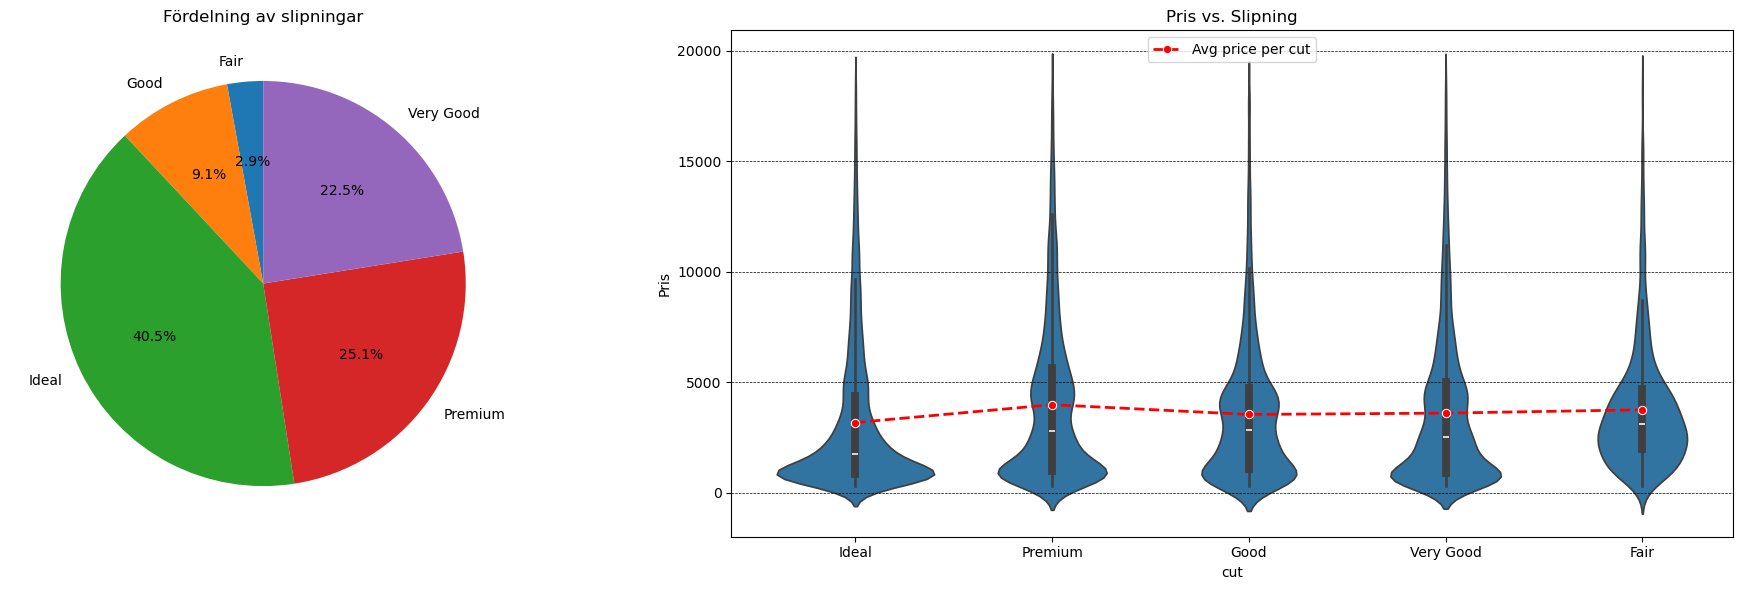

In [28]:
distribution_by_cuts = df.groupby(['cut']).size()
avg_price_per_cut = df.groupby('cut')['price'].mean()

fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(20, 6))

axes[0].pie(
    distribution_by_cuts, 
    labels=distribution_by_cuts.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Fördelning av slipningar')

sns.violinplot(x='cut', y='price', data=df, ax=axes[1])
axes[1].set_ylabel('Pris')
axes[1].set_title('Pris vs. Slipning')

sns.lineplot(
    x=avg_price_per_cut.index, 
    y=avg_price_per_cut.values, 
    ax=axes[1], 
    color='red', 
    marker='o', 
    linestyle='dashed', 
    linewidth=2, 
    label='Avg price per cut'
)

plt.grid(color='black', linestyle='--', linewidth=0.5, axis='y')
plt.show()

### Klarhet

Guldfynds diamanter med Wesselton-klassificering brukar ha en klarhet som motsvarar VS1, VS2 eller SI1, vilket innebär att de har små eller knappt synliga inneslutningar. Top Wesselton kan ibland motsvara VVS1 eller VVS2, vilket innebär en ännu högre klarhet.

I datan ser vi följande klarhetsgrader:
- IF (Internally Flawless) – Inga synliga inneslutningar ens vid 10x förstoring.
- VVS1 & VVS2 (Very Very Slightly Included) – Extremt små inneslutningar, svåra att se även vid förstoring.
- VS1 & VS2 (Very Slightly Included) – Små inneslutningar, ofta osynliga för blotta ögat.
- SI1 & SI2 (Slightly Included) – Inneslutningar som kan vara synliga utan förstoring.
- I1 (Included) – Tydliga inneslutningar som kan påverka diamantens briljans.

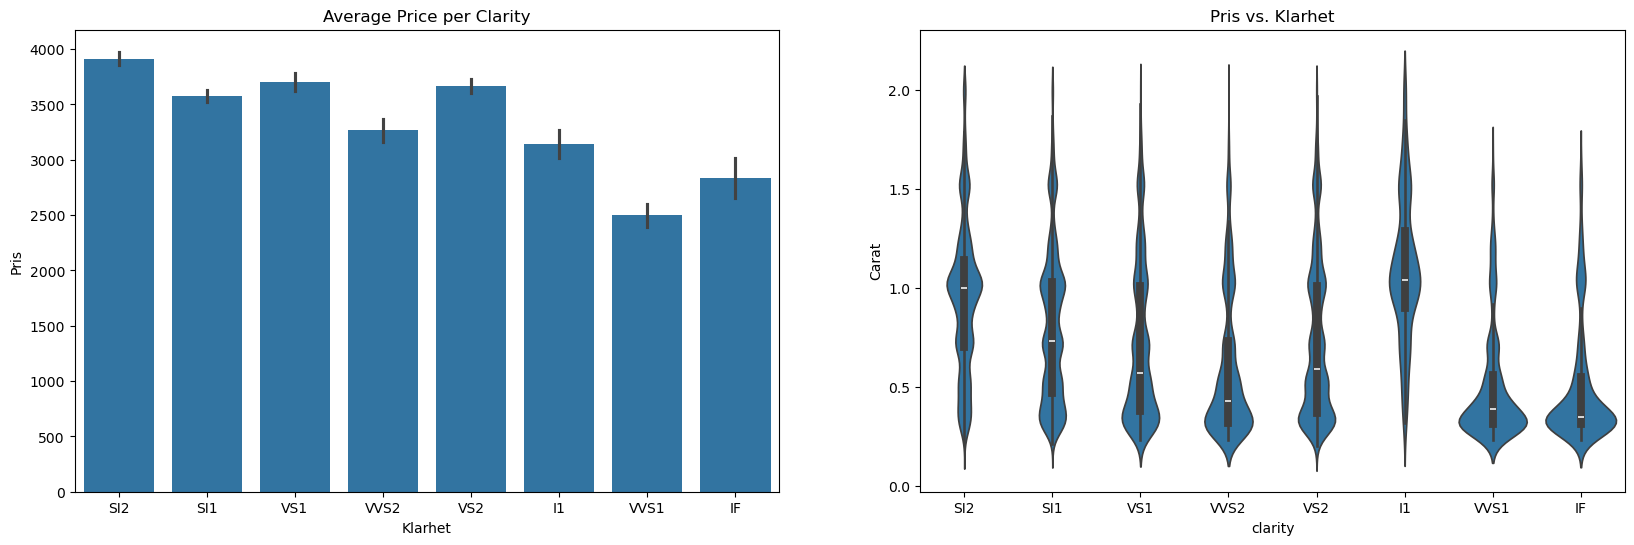

In [29]:
avg_price_per_clarity = df.groupby('clarity')['price'].mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Stapeldiagram med medelpris per klarhet
sns.barplot(x='clarity', y='price', data=df, ax=axes[0])
axes[0].set_xlabel('Klarhet')
axes[0].set_ylabel('Pris')
axes[0].set_title('Average Price per Clarity')

sns.violinplot(x='clarity', y='carat', data=df, ax=axes[1])
axes[1].set_ylabel('Carat')
axes[1].set_title('Pris vs. Klarhet')

plt.show()

Med tanke på att Guldfynds sortiment kretsar kring diamanter som ska ge intrycket av hög visuell kvalitet (Wesselton – vilket ofta motsvarar diamanter i klasserna VS1, VS2 eller SI1), samt att de vill erbjuda produkter med ett attraktivt pris, är SI2-diamanter det mest lämpliga valet.
Även om I1-diamanter uppvisar en större mängd av högre karat, kan deras synliga inneslutningar göra dem mindre lämpade för en premiumimage. SI2-diamanter erbjuder dock en bra kompromiss: de har en stabil prissättning, en bred variation i carat (vilket ökar möjligheten att välja rätt storlek), och de ligger inom ett kvalitetssegment där inneslutningarna inte är så påtagliga när stenen är monterad i ett smycke.


## Executive Summary
Utifrån analysen av diamantdata visar det att diamanter med färger mellan D och G, i kombination med slipningsgraderna Premium, Ideal och Very Good samt klarheter i segmenten VS1, VS2, VVS1, VVS2 och IF, utgör en attraktiv och stabil produktkategori för Guldfynd. Dessa diamanter – ofta benämnda som Wesselton-diamanter – erbjuder en mångsidighet i prisklasser och en balanserad kombination av visuell kvalitet, stabil värdeutveckling och ett varierat utbud.

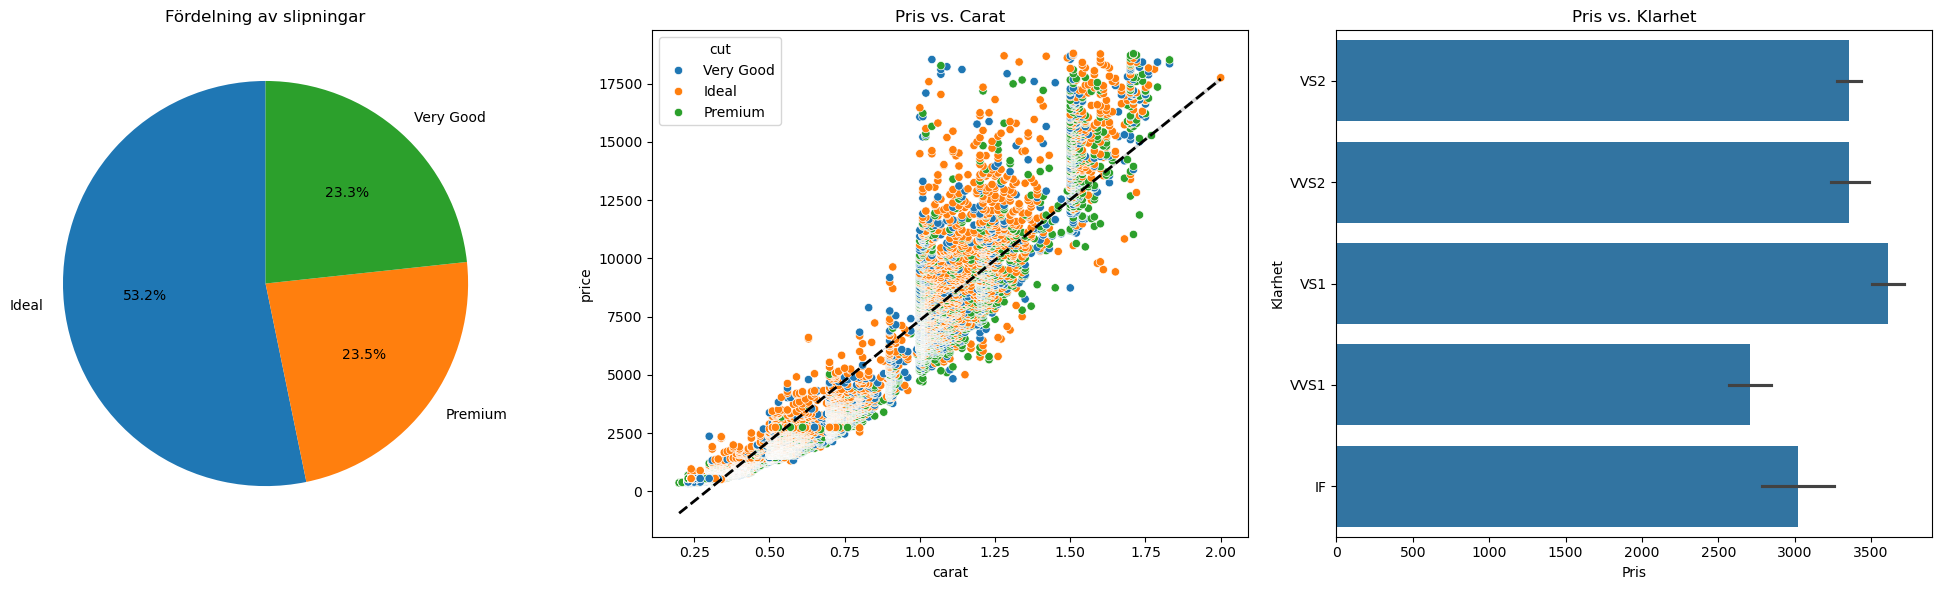

In [30]:
colored_filtered_diamonds = df[df['color'].isin(['D', 'E', 'F', 'G'])]

g_sorted_by_clarity = colored_filtered_diamonds[
    colored_filtered_diamonds['clarity'].isin(['VVS1', 'VVS2', 'VS1', 'VS2', 'IF'])
]

g_sorted_by_cuts = g_sorted_by_clarity[
    g_sorted_by_clarity['cut'].isin(['Very Good', 'Ideal', 'Premium'])
]

distribution_by_cuts = g_sorted_by_cuts.groupby('cut').size()

fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(20, 6))

# 1. Piechart
axes[0].pie(
    distribution_by_cuts.values, 
    labels=distribution_by_cuts.index, 
    autopct='%1.1f%%', 
    startangle=90
)
axes[0].set_title('Fördelning av slipningar')

# 2. Scatterplot
sns.scatterplot(
    x='carat', 
    y='price', 
    hue='cut', 
    data=g_sorted_by_cuts, 
    ax=axes[1]
)
axes[1].set_xlabel('Carat')
axes[1].set_ylabel('Pris')
axes[1].set_title('Pris vs. Carat')

# Regressionslinje
sns.regplot(
    x='carat',
    y='price',
    data=g_sorted_by_cuts,
    scatter=False,
    ax=axes[1],
    color='black',
    line_kws={'linestyle': 'dashed', 'linewidth': 2}
)

# 3. Barplot
sns.barplot(
    x='price',
    y='clarity',
    data=g_sorted_by_cuts,
    ax=axes[2]
)
axes[2].set_xlabel('Pris')
axes[2].set_ylabel('Klarhet')
axes[2].set_title('Pris vs. Klarhet')

plt.show()

### Huvudpunkter:

- **Färger D–G:**  
  Diamanter i färgintervallet D till G visar en optimal balans mellan exkluderad färgton och kostnadseffektivitet. Dessa stenar uppfyller kraven på att ge en nästan färglös framtoning, vilket är centralt för en premiumprodukt, men till ett pris som tillåter en bredare marknadspositionering.

- **Slipningsgrader – Premium, Ideal och Very Good:**  
  Pie-charten visar att majoriteten av diamanterna i det filtrerade segmentet har Ideal- eller Premium-slipning. Detta speglar en betoning på hög ljusreflektion och stilren design, vilket stärker den visuella attraktionskraften hos guldfynds sortiment. Dessa slipningsgrader säkerställer även en enhetlig utformning med stark marknadsefterfrågan.

- **Klarhetsgrader – VS1, VS2, VVS1, VVS2 och IF:**  
  Analysen indikerar att de utvalda klarhetsgraderna uppvisar en stabil prisbild med en begränsad prisspridning. Trots mindre visuella inneslutningar kan dessa diamanter ge ett stabilt värdeuttag och uppfylla kundernas krav på kvalitet, vilket gör dem väl lämpade för både premium- och mellanklassmarknaden.

- **Stabilitet och varierat utbud:**  
  Utifrån scatter- och barplot-graferna visar att det finns ett tydligt, positivt samband mellan carat och pris, samt att klarhetsgraderna ger en förutsägbar prissättning. Detta medför fördelen att Guldfynd kan erbjuda diamanter i olika storlekar och prisklasser utan att kompromissa med den visuella och kvalitativa standarden.

### Rekommendation:

Med utgångspunkt i dessa insikter rekommenderas att Guldfynd investerar i diamanter med:
- **Färg:** D – G, för att säkerställa en estetiskt tilltalande, nästan färglös look.
- **Slipning:** Premium, Ideal och Very Good, vilket utgör en stark grund för en attraktiv produktlinje med optimal ljusreflektion.
- **Klarhet:** VS1, VS2, VVS1, VVS2 och IF, då dessa segment erbjuder en stabil värdeutveckling samtidigt som de uppfyller kraven på visuell kvalitet och prispåverkan.

Denna investeringsstrategi positionerar Guldfynd för att möta marknadens efterfrågan på diamanter med hög standard och varierande prisklasser, vilket i sin tur möjliggör en konkurrenskraftig och diversifierad produktportfölj. Investeringen i det utvalda segmentet bidrar till stabila marginaler och långsiktig värdeökning, vilket är avgörande för företagets fortsatta framgång.